<a href="https://colab.research.google.com/github/tqnhu2407/Image_Processing/blob/master/img_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

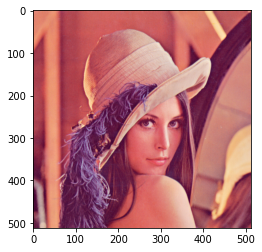

In [3]:
im = PIL.Image.open('Lenna.png')
im = np.array(im)
plt.imshow(im)

In [5]:
height, width = im.shape[0], im.shape[1]
pixels = np.reshape(im, (width*height, 3))

In [22]:
class Image():

    # list
    result = None

    def __init__(self, im, pixels, width, height):
        self.im = im # np.array 3D
        self.pixels = pixels # np.array 2D
        self.width = width
        self.height = height
    
    # 1

    # 2

    # 3
    def gray(self):
        self.result = []
        for row in range(height):
            self.result.append([])

        for row in range(height):
            for col in range(width):
                # New grayscale image = ( (0.3 * R) + (0.59 * G) + (0.11 * B) ).
                pixel = self.im[row][col]
                r, g, b = pixel[0], pixel[1], pixel[2]
                self.result[row].append(int(0.3*r + 0.59*g + 0.11*b))
            
        plt.imshow(np.array(self.result), cmap = 'gray')
    
    # 4
    def flip_horizontal(self):
        self.result = self.im.tolist()
        for row in range(self.height):
            self.result[row].reverse()
        plt.imshow(np.array(self.result))
    
    def flip_vertical(self):
        self.result = self.im.tolist()
        self.result = [[self.result[height - 1 - i][j] for j in range(width)] for i in range(height)]
        plt.imshow(np.array(self.result))

    # 5

    # 6
    def blur(self):
        self.result = self.im.tolist()
        pix = self.im.tolist()

        for x in range(1, self.height - 1):
            for y in range(1, self.width - 1):
                box = []
                box.append(pix[x-1][y-1])
                box.append(pix[x][y-1])
                box.append(pix[x+1][y-1])
                box.append(pix[x-1][y])
                box.append(pix[x][y])
                box.append(pix[x+1][y])
                box.append(pix[x-1][y+1])
                box.append(pix[x][y+1])
                box.append(pix[x+1][y+1])
                avg0, avg1, avg2 = 0, 0, 0
                for i in range(9):
                    avg0 += box[i][0]
                    avg1 += box[i][1]
                    avg2 += box[i][2]
                self.result[x][y][0] = avg0 // 9
                self.result[x][y][1] = avg1 // 9
                self.result[x][y][2] = avg2 // 9

        plt.imshow(np.array(self.result))        

In [23]:
my_image = Image(im, pixels, width, height)

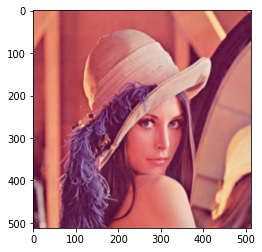

In [24]:
my_image.blur()

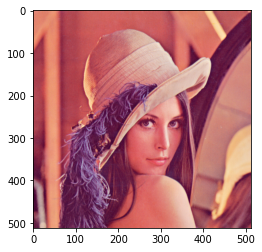

In [15]:
plt.imshow(my_image.im)